# octave

In [2]:
format long
fmt = format



fmt = long


## `fds_example.m`

In [3]:
% fds_example.m by John Shiach
%
% This program solves the linear advection equation using a first order FDS

% Clear workspaces (should always be done at the start of an m-file)

clc
clearvars

% Define variables
N = 11; % number of nodes
xmin = 0; % min value of x
xmax = 1; % max value of x
dt = 0.05; % time step
v = 1; % velocity
t = 0; % initial value of t

% Calculate node positions
dx = (xmax - xmin) / (N - 1);
x = xmin:dx:xmax;

% Calculate initial conditions
u = exp(-100 * (x - 0.4).^2);

% Output column headings and initial conditions to the command window
hline = repmat('-', 1, 9 * (N + 1));
fprintf('\n%s', hline)
fprintf('\n    t   ')
fprintf('|   u_%1i  ', [0:N - 1])
fprintf('\n%s', hline)
fprintf('\n %6.2f ', t)
fprintf('|%7.4f ', u)

% pre-calculate C = v * dt / dx
C = v * dt / dx;

% Perform 3 iterations of the FDS
for n = 1:3

    % Calculate boundary conditions
    u(1) = 0;
    u(N) = 0;

    % Calculate new values of u
    unew = u;

    for i = 2:N - 1
        unew(i) = u(i) - C * (u(i) - u(i - 1));
    end

    % Update t and u
    t = t + dt;
    u = unew;

    % Output current solution
    fprintf('\n %6.2f ', t)
    fprintf('|%7.4f ', u)
end

fprintf('\n%s\n\n', hline)





























------------------------------------------------------------------------------------------------------------

    t   
|   u_0  |   u_1  |   u_2  |   u_3  |   u_4  |   u_5  |   u_6  |   u_7  |   u_8  |   u_9  |   u_10  

------------------------------------------------------------------------------------------------------------

   0.00 
| 0.0000 | 0.0001 | 0.0183 | 0.3679 | 1.0000 | 0.3679 | 0.0183 | 0.0001 | 0.0000 | 0.0000 | 0.0000 


























   0.05 | 0.0000 | 0.0001 | 0.0092 | 0.1931 | 0.6839 | 0.6839 | 0.1931 | 0.0092 | 0.0001 | 0.0000 | 0.0000 
   0.10 | 0.0000 | 0.0000 | 0.0046 | 0.1012 | 0.4385 | 0.6839 | 0.4385 | 0.1012 | 0.0046 | 0.0000 | 0.0000 
   0.15 | 0.0000 | 0.0000 | 0.0023 | 0.0529 | 0.2698 | 0.5612 | 0.5612 | 0.2698 | 0.0529 | 0.0023 | 0.0000 


------------------------------------------------------------------------------------------------------------



## `laplace.m`




































------------------------------------------------------------------------------------------------
     k    |







   u(1, 1) |   u(2, 1) |   u(3, 1) |   u(1, 2) |   u(2, 2) |   u(3, 2) |

  L2 error
------------------------------------------------------------------------------------------------ 
      0   
|  0.000000 |  0.000000 |  0.000000 |  0.000000 |  0.000000 |  0.000000 
|  1.000000




























      1   |  3.500000 |  1.925000 |  4.525000 |  4.325000 |  2.225000 |  4.525000 |  8.975696 
      2   |  5.062500 |  4.487500 |  6.137500 |  5.756250 |  4.918750 |  6.212500 |  4.874463 
      3   |  6.060937 |  5.954688 |  7.200000 |  6.820312 |  6.339063 |  7.289062 |  2.930346 
      4   |  6.693750 |  6.825000 |  7.835938 |  7.425000 |  7.241016 |  7.909766 |  1.768262 
      5   |  7.062500 |  7.367676 |  8.208691 |  7.808691 |  7.764941 |  8.294238 |  1.067219 
      6   |  7.294092 |  7.684033 |  8.440479 |  8.031860 |  8.0926

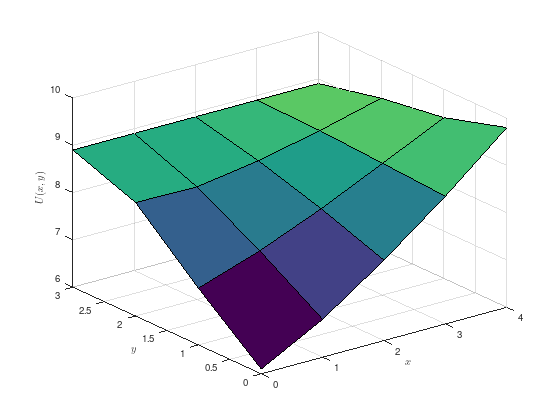

In [4]:
% laplace.m by John Shiach
%
% This program calculates the solution to the Laplace equation using the
% Jacobi method

clearvars
close all

% define variables
Nx = 5; % no. of nodes in the x direction (inc ghost nodes)
Ny = 4; % no. of nodes in the y direction (inc ghost nodes)
lenx = 4; % length of the x domain
leny = 3; % length of the y domain
err = 1; % error between sucessive iterations
tol = 1e-6; % convergence tolerance
k = 0; % iteration counter

% Calculate x and y node co-ordinates
dx = lenx / (Nx - 1);
dy = leny / (Ny - 1);
x = 0:dx:lenx;
y = 0:dy:leny;
[x, y] = meshgrid(x, y);

% Initialise solution array
u = [8.9 8.9 8.9 8.9 8.9;
    8.4 0.0 0.0 0.0 9.2;
    7.2 0.0 0.0 0.0 9.4;
    6.1 6.8 7.7 8.7 9.8];

u = flipud(u); % invert u to be consistent with matrix indexing

% output column heading and initial values
hline = repmat('-', 1, 12 * ((Nx - 2) * (Ny - 2) + 2));
fprintf('%s\n     k    |', hline)

for j = 1:Ny - 2

    for i = 1:Nx - 2
        fprintf('   u(%1i, %1i) |', i, j)
    end

end

fprintf('  L2 error\n%s \n   %4i   ', hline, k)
fprintf('|%10.6f ', u(2:Ny - 1, 2:Nx - 1)')
fprintf('|%10.6f\n', err)

% perform iterations until convergence
while err > tol

    % calculate improved estimate using the Jacobi method
    unew = u;

    for j = 2:Ny - 1

        for i = 2:Nx - 1
            unew(j, i) = (u(j + 1, i) + u(j, i + 1) + u(j - 1, i) + u(j, i - 1)) / 4;
        end

    end

    % calculate absolute error
    err = sqrt(sum(sum((unew - u).^2)));

    % update u
    u = unew;
    k = k + 1;

    % output current solution
    fprintf('   %4i   ', k)
    fprintf('|%10.6f ', u(2:Ny-1, 2:Nx-1)')
    fprintf('|%10.6f \n', err)

end

fprintf('%s\n', hline)

% Plot solution
surf(x, y, u)
xlabel('$x$', 'fontsize', 16, 'interpreter', 'latex')
ylabel('$y$', 'fontsize', 16, 'interpreter', 'latex')
zlabel('$U(x, y)$', 'fontsize', 16, 'interpreter', 'latex')

## `Tridiag.m`

In [5]:
function x = Tridiag(A, d)

    % This function solves a tridiagonal linear system of the form Ax = d
    % using the Thomas algorithm

    % Calculate size of the system
    N = length(d);

    % Determine lower, main and upper diagonal elements
    a = [0; diag(A, -1)];
    b = diag(A);
    c = [diag(A, 1); 0];

    % Forward sweep
    c(1) = c(1) / b(1);
    d(1) = d(1) / b(1);

    for i = 2:N
        c(i) = c(i) / (b(i) - a(i) * c(i - 1));
        d(i) = (d(i) - a(i) * d(i - 1)) / (b(i) - a(i) * c(i - 1));
    end

    % Backward sweep
    x(N) = d(N);

    for i = N - 1:-1:1
        x(i) = d(i) - c(i) * x(i + 1);
    end

end


## `advection.m`

In [6]:
% advection.m by John Shiach
%
% This program solves the advection equation using the FOU scheme

% Clear workspaces
clearvars
close all

% Define variables
N = 101; % number of nodes
xmin = 0; % lower bound of x
xmax = 1; % upper bound of x
v = 0.5; % velocity
t = 0; % time variable
tmax = 1; % max value of t
dt = 0.01; % time step

% Discretise the domain (remember to include ghost nodes)
dx = (xmax - xmin) / (N - 1);
x = xmin - dx:dx:xmax + dx;

function u = f(x)

    % This function defines the initial profile.
    u = exp(-200 * (x - 0.25).^2);
end

% Define initial conditions
u = f(x); % solution array u^n

% Time marching loop
while t < tmax

    % Ensure that t does not exceed tmax
    dt = min(dt, tmax - t);

    % Calculate boundary conditions
    u(1) = u(3);
    u(N + 2) = u(N);

    % Calculate values of u^(n + 1) using the FOU scheme
    unew = u;
    C = v * dt / dx;

    for i = 2:N + 1
        unew(i) = u(i) - C * (u(i) - u(i -1));
    end

    % Update u and t
    u = unew;
    t = t + dt;

    % Calculate exact solution
    uexact = f(x - v * t);

    % Plot the numerical against the exact solution
    plot(x, uexact, 'r-', 'linewidth', 2)
    hold on
    plot(x, u, 'bo-', 'markerfacecolor', 'b')
    hold off
    axis([xmin, xmax, -0.5, 1.5])
    xlabel('$x$', 'fontsize', 16, 'interpreter', 'latex')
    ylabel('$u(t, x)$', 'fontsize', 16, 'interpreter', 'latex')
    title(sprintf('$t = %1.3f$ s', t), 'fontsize', 16, 'interpreter', 'latex')
    shg
    pause(0.001)
end

% Add legends to plot
leg = legend('exact solution', 'numerical solution');
set(leg, 'fontsize', 12, 'interpreter', 'latex')

Inline plot failed, consider trying another graphics toolkit

error: close: first argument must be "all", a figure handle, or a figure name
error: called from
    close at line 90 column 7
    _make_figures>safe_print at line 124 column 7
    _make_figures at line 49 column 13



## `oned_swe.m`

In [7]:
% oned_swe.m by John Shiach
%
% This program solves the SWE using the Lax-Friedrichs scheme

% Clear workspaces

clearvars
close all

function dt = calculate_dt(U, dx, t, tmax)

    % This function calculates the maximum allowable time step
    global gravity
    dt = 0.9 * dx / max(abs(U(2, :) ./ U(1, :)) + sqrt(gravity * U(1, :)));
    dt = min(dt, tmax - t);

end

function U = calculate_BC(U)

    % This function calculates the values of the ghost nodes using transmissive
    % boundary conditions

    U(:, 1) = U(:, 3);
    U(:, end) = U(:, end - 2);

end

function F = calculate_F(U)

    % This function calculates the flux vector F from U.
    global gravity
    F(1, :) = U(2, :);
    F(2, :) = U(2, :).^2 ./ U(1, :) + 0.5 * gravity * U(1, :).^2;
end

function Unp1 = Lax_Friedrichs(U, F, dt, dx)

    % This function calculates a single step of the Lax-Friedrichs scheme

    N = size(U, 2) - 2;
    Unp1 = U;
    C = 0.5 * dt / dx;

    for i = 2:N + 1
        Unp1(:, i) = 0.5 * (U(:, i + 1) + U(:, i - 1)) - C * (F(:, i +1) - F(:, i - 1));
    end

end

% Define global parameters
global gravity
gravity = 9.81; % acceleration due to gravity

% Define variables
N = 101; % number of nodes
xmin = 0; % lower bound of x
xmax = 1; % upper bound of x
hL = 1; % water height to the left of the dam
hR = 0.5; % water height to the right of the dam
t = 0; % time variable
tmax = 0.1; % max value of t

% Define spatial array (including ghost nodes)
dx = (xmax - xmin) / (N - 1);
x = xmin - dx:dx:xmax + dx;

% Define initial conditions
U = zeros(2, length(x));
U(1, x <= 0.5) = hL;
U(1, x > 0.5) = hR;

% Time marching loop
while t < tmax

    % Calculate maximum allowable time step
    dt = calculate_dt(U, dx, t, tmax);

    % Calculate boundary conditions
    U = calculate_BC(U);

    % Calculate F vector
    F = calculate_F(U);

    % Calculate one step of the Lax-Friedrichs scheme
    U = Lax_Friedrichs(U, F, dt, dx);

    % Update t
    t = t + dt;

    % Plot current solution
    num_plot = plot(x, U(1, :), 'o-', 'markerfacecolor', 'blue');
    axis([xmin, xmax, 0, 1.2])
    xlabel('$x$', 'fontsize', 16, 'interpreter', 'latex')
    ylabel('$h$', 'fontsize', 16, 'interpreter', 'latex')
    title(sprintf('$t = %1.3f$', t), 'fontsize', 16, 'interpreter', 'latex')
    shg
    pause(0.001)
end

% Plot numerical solution against exact solution
% load dambreak_exact
% hold on
% exact_plot = plot(xexact, hexact, 'r-', 'linewidth', 2);
% hold off
% leg = legend([exact_plot, num_plot], 'exact solution', 'numerical solution');
% set(leg, 'fontsize', 14, 'interpreter', 'latex')

Inline plot failed, consider trying another graphics toolkit

error: close: first argument must be "all", a figure handle, or a figure name
error: called from
    close at line 90 column 7
    _make_figures>safe_print at line 124 column 7
    _make_figures at line 49 column 13

